In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from datetime import datetime
%matplotlib inline

In [2]:
rows = open('data/reversals_raw_mwrd.txt', 'r').read().split('\n');
rows[:15]

['6/15-16/2015',
 '0',
 '997.5 ',
 '167.2 ',
 '1164.7',
 '6/30-7/1/14',
 '0',
 '362.0 ',
 '163.0 ',
 '525.0',
 '4/18-19/13 ',
 '3185.6 ',
 '6104.7 ',
 '1429.2 ',
 '10719.5']

In [7]:
# We are expecting 29 events, each represented by 5 rows
print("Number of events found: %s" % str(len(rows)/5))

Number of events found: 29.0


In [39]:
# MWRD gives us the date in many formats.  year in many random formats
def normalize_date(date_str):
    date_split = date_str.split('/')
    day = date_split[1]
    if '-' in day:
        day = day.split('-')[0]
    year = int(date_split[-1])
    if year < 1985:
        if year > 20:
            year = '19%s' % year
        elif year > 9:
            year = '20%s' % year
        else:
            year = '200%s' % year    
    return{'start_date': datetime(int(year), int(date_split[0]), int(day)),
            'year': int(year)}
date_str = '4/18-19/13'
print(date_str)
normalize_date(date_str)

4/18-19/13


{'start_date': datetime.datetime(2013, 4, 18, 0, 0), 'year': 2013}

In [40]:
events = []
for i in range(num_rows):
    date_str = rows[(i*5)]
    normalized_date = normalize_date(date_str)
    events.append({
                'date_raw': date_str,
                'obrien': float(rows[(i*5) + 1].strip()),
                'crcw': float(rows[(i*5) + 2].strip()),
                'wilmette': float(rows[(i*5) + 3].strip()),
                'total': float(rows[(i*5) + 4].strip()),
                'start_date': normalized_date['start_date'],
                'year': normalized_date['year'],
            
    })
events[:3]

[{'crcw': 997.5,
  'date_raw': '6/15-16/2015',
  'obrien': 0.0,
  'start_date': datetime.datetime(2015, 6, 15, 0, 0),
  'total': 1164.7,
  'wilmette': 167.2,
  'year': 2015},
 {'crcw': 362.0,
  'date_raw': '6/30-7/1/14',
  'obrien': 0.0,
  'start_date': datetime.datetime(2014, 6, 30, 0, 0),
  'total': 525.0,
  'wilmette': 163.0,
  'year': 2014},
 {'crcw': 6104.7,
  'date_raw': '4/18-19/13 ',
  'obrien': 3185.6,
  'start_date': datetime.datetime(2013, 4, 18, 0, 0),
  'total': 10719.5,
  'wilmette': 1429.2,
  'year': 2013}]

In [41]:
csos = pd.DataFrame(events)
csos.head()

,crcw,date_raw,obrien,start_date,total,wilmette,year
0,997.5,6/15-16/2015,0.0,2015-06-15,1164.7,167.2,2015
1,362.0,6/30-7/1/14,0.0,2014-06-30,525.0,163.0,2014
2,6104.7,4/18-19/13,3185.6,2013-04-18,10719.5,1429.2,2013
3,1716.2,7/24/2011,0.0,2011-07-24,2220.5,504.3,2011
4,0.0,5/29/2011,0.0,2011-05-29,107.0,107.0,2011


In [42]:
csos_by_year = dict(csos['year'].value_counts())
print(csos_by_year)

{1985: 2, 1986: 1, 1987: 2, 1989: 1, 1990: 3, 1996: 1, 1997: 2, 1999: 1, 2001: 3, 2002: 1, 2007: 1, 2008: 2, 2009: 3, 2010: 1, 2011: 2, 2013: 1, 2014: 1, 2015: 1}


In [43]:
for year in range(1985,2016):
    if year not in csos_by_year.keys():
        csos_by_year[year] = 0
csos_by_year

{1985: 2,
 1986: 1,
 1987: 2,
 1988: 0,
 1989: 1,
 1990: 3,
 1991: 0,
 1992: 0,
 1993: 0,
 1994: 0,
 1995: 0,
 1996: 1,
 1997: 2,
 1998: 0,
 1999: 1,
 2000: 0,
 2001: 3,
 2002: 1,
 2003: 0,
 2004: 0,
 2005: 0,
 2006: 0,
 2007: 1,
 2008: 2,
 2009: 3,
 2010: 1,
 2011: 2,
 2012: 0,
 2013: 1,
 2014: 1,
 2015: 1}

In [45]:
sum(csos_by_year.values())

29

<Container object of 31 artists>

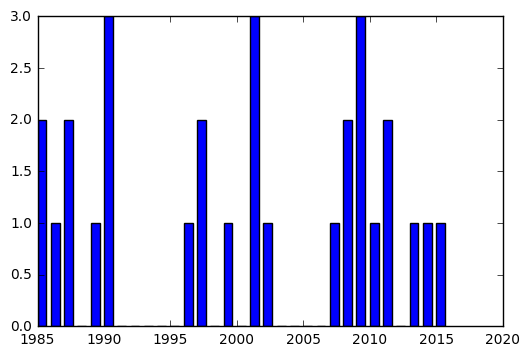

In [46]:
width = 1/1.5
plt.bar(csos_by_year.keys(), csos_by_year.values(), width, color="blue")

In [47]:
csos.sum(axis=0)

crcw        26730.7
obrien       8568.8
total       45920.4
wilmette    10620.9
year        58007.0
dtype: float64

In [48]:
# We have dumped 46 billion gallons of sewage into Lake Michigan since 1985